## Task 5: Exploratory Data Analysis (EDA)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

In [19]:
print(df['Age'].dtypes)

float64


In [43]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Age']=df['Age'].astype(int)

# Use .describe(), .info(), .value_counts()

In [44]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.544332,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 80.2+ KB


In [49]:
df.value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age  SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38   1      0      PC 17599  71.2833   C85    C           1
622          1         1       Kimball, Mr. Edwin Nelson Jr                          male    42   1      0      11753     52.5542   D19    S           1
573          1         1       Flynn, Mr. John Irwin ("Irving")                      male    36   0      0      PC 17474  26.3875   E25    S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39   1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39   1      1      17421     110.8833  C68    C           1
                                                                                       

# Use sns.pairplot(), sns.heatmap() for visualization

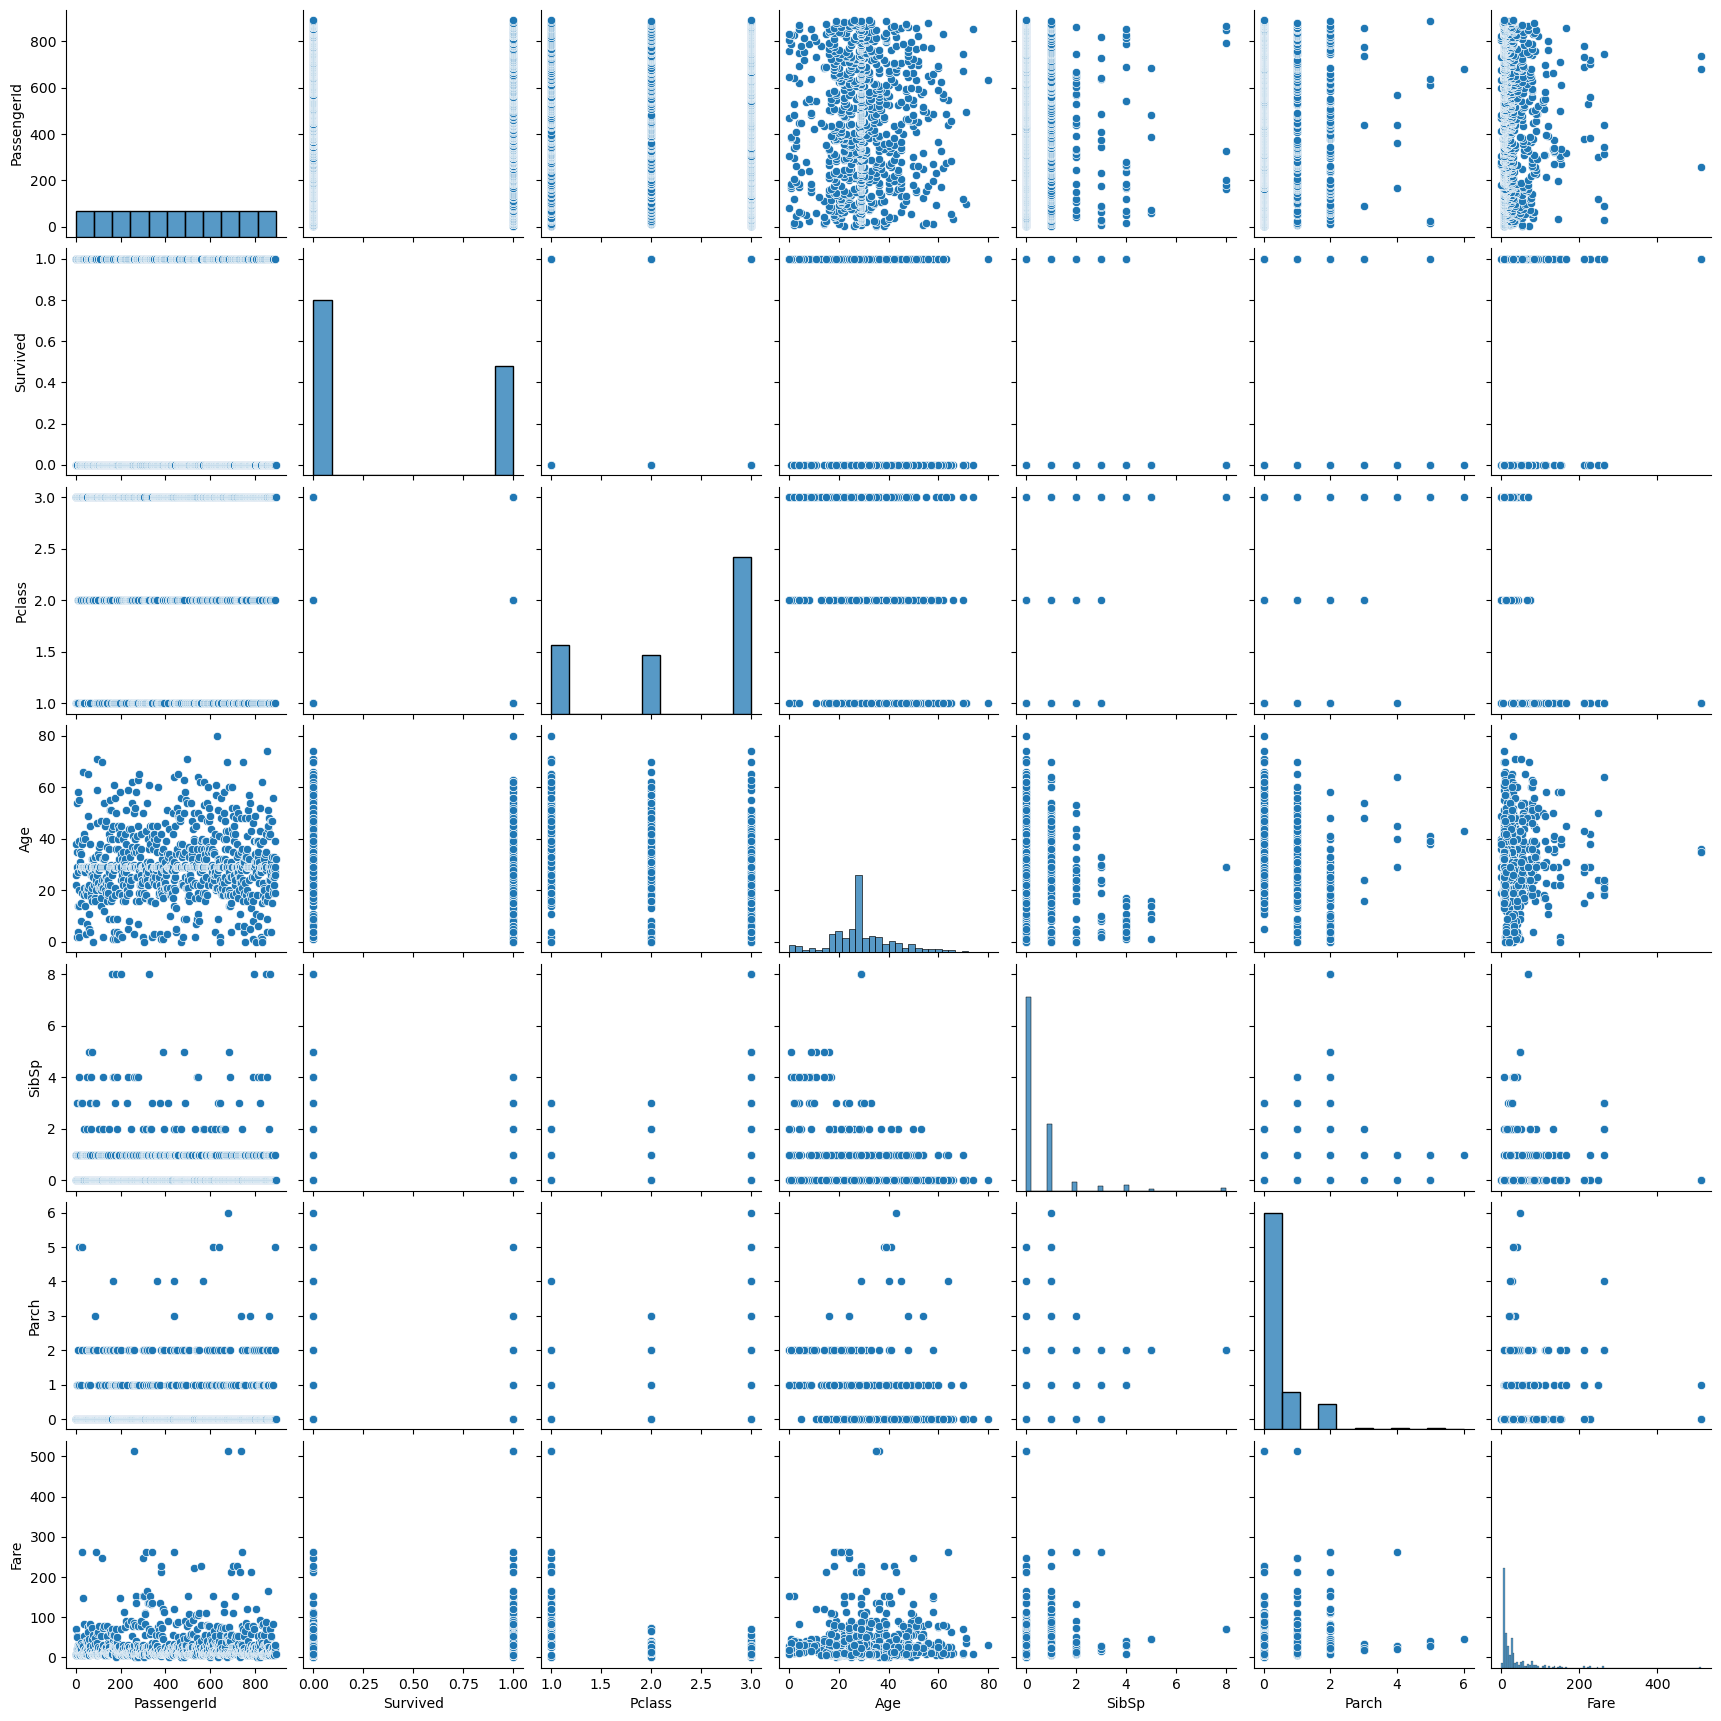

In [53]:
sns.pairplot(df)

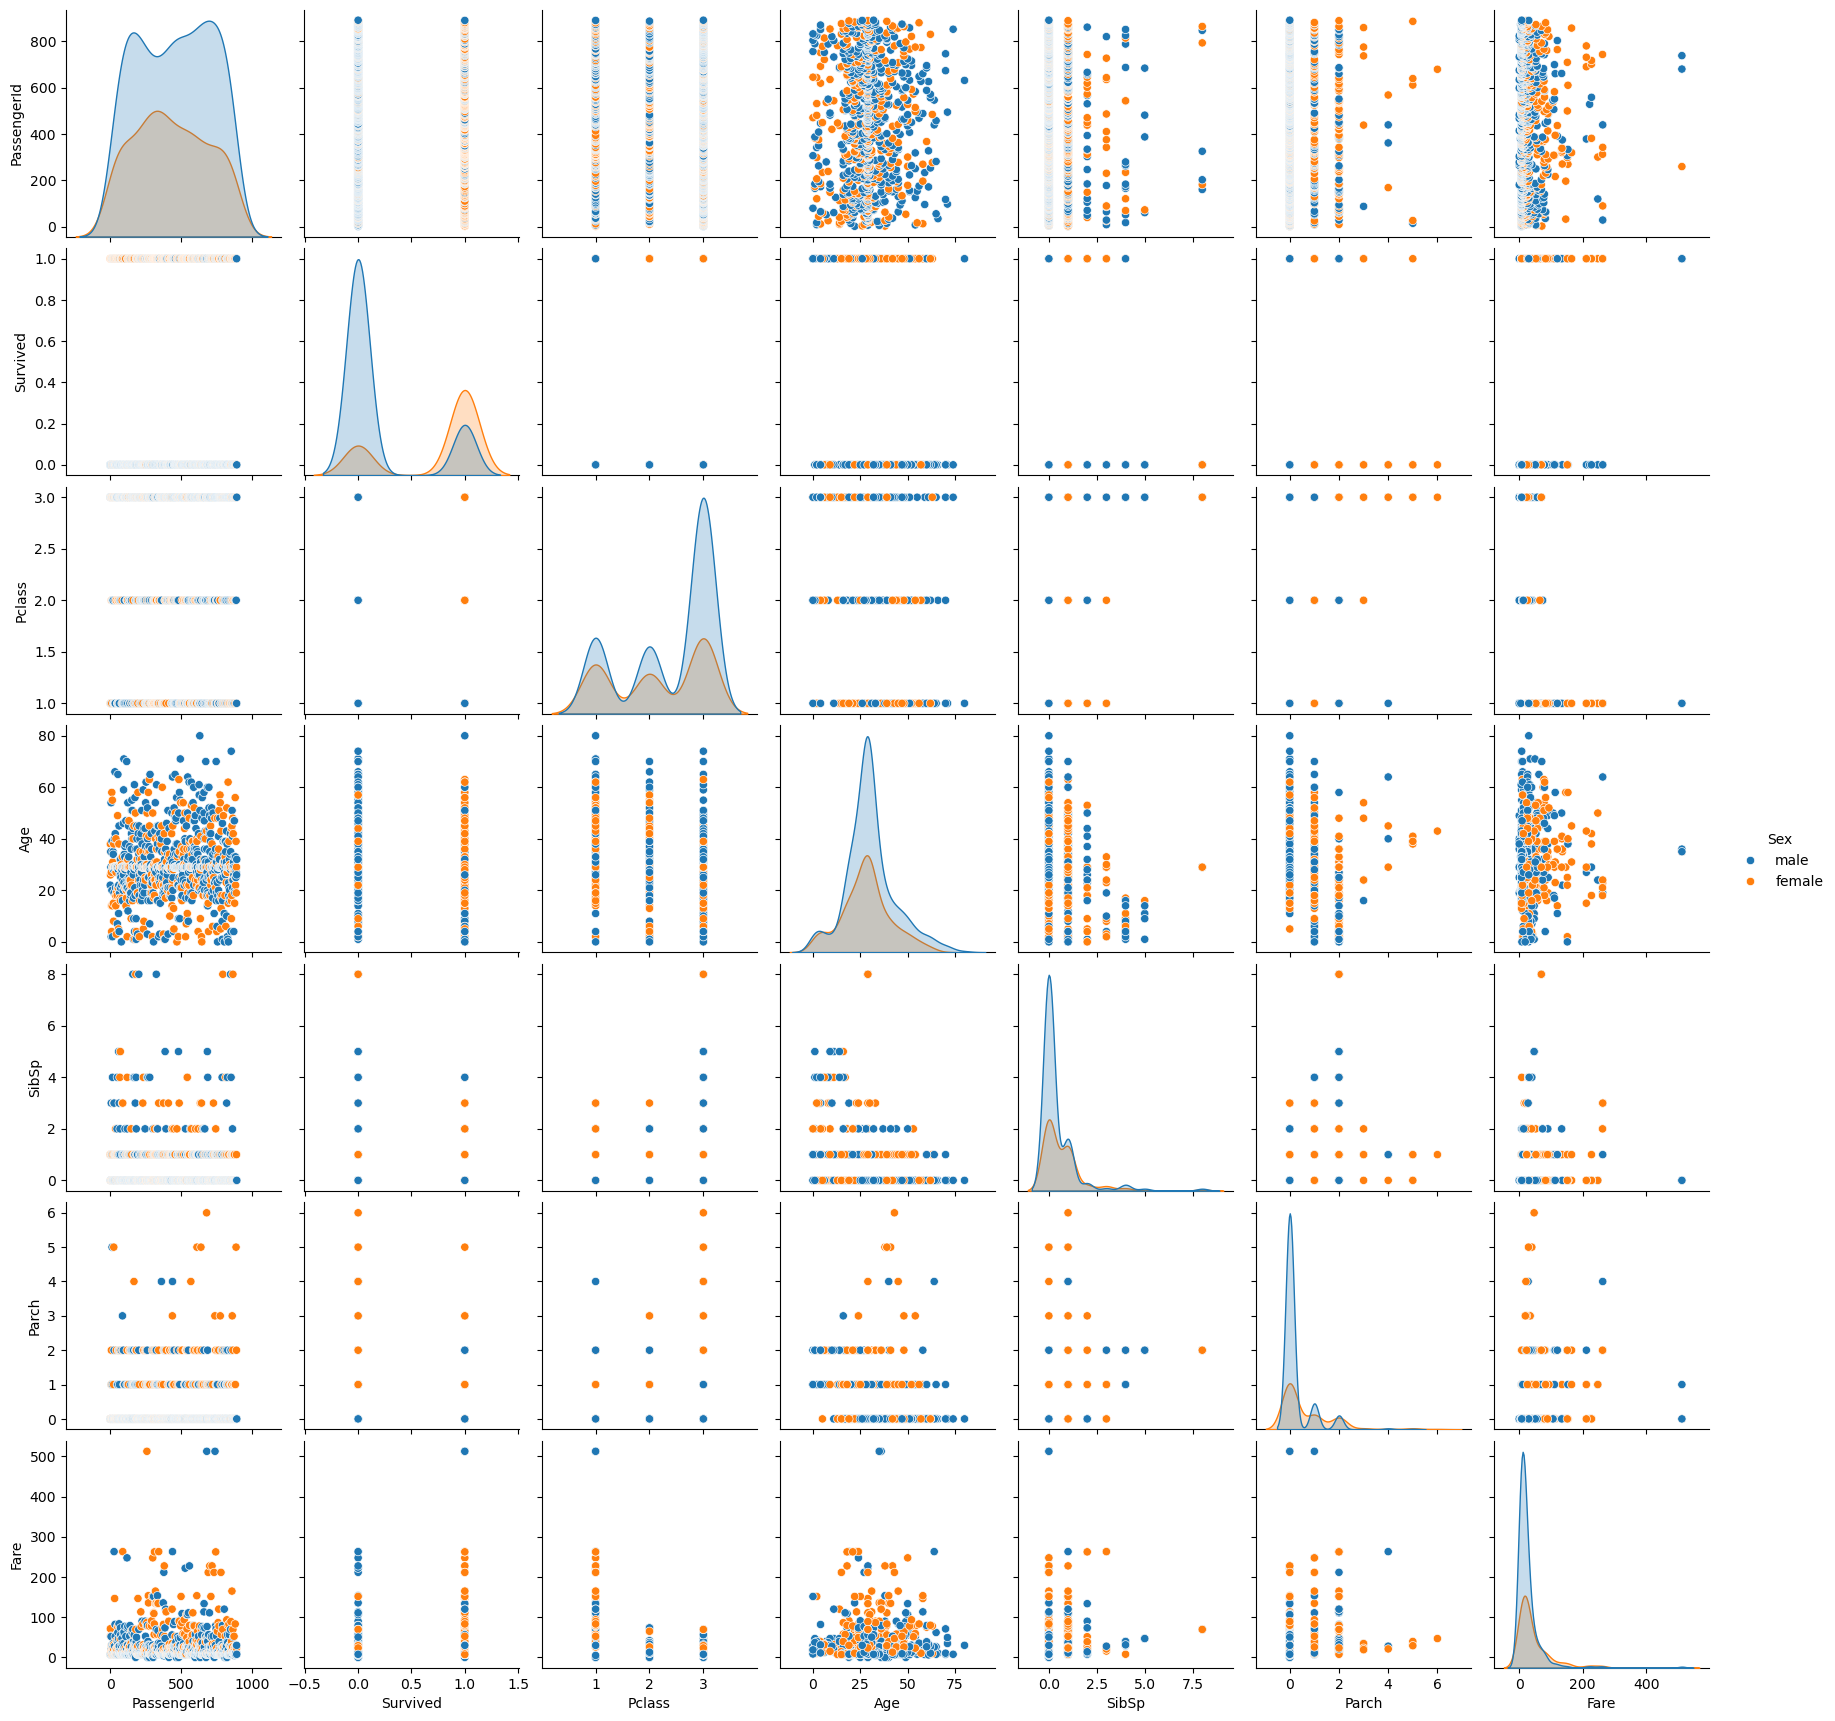

In [67]:
sns.pairplot(df , hue = 'Sex' )
plt.show()

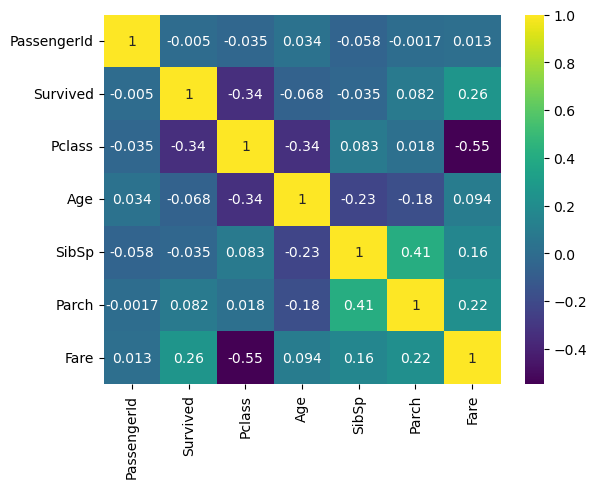

In [66]:
corr = df.corr(numeric_only = True)
sns.heatmap(corr , annot = True , cmap = 'viridis')
plt.show()

# Identify relationships and trends

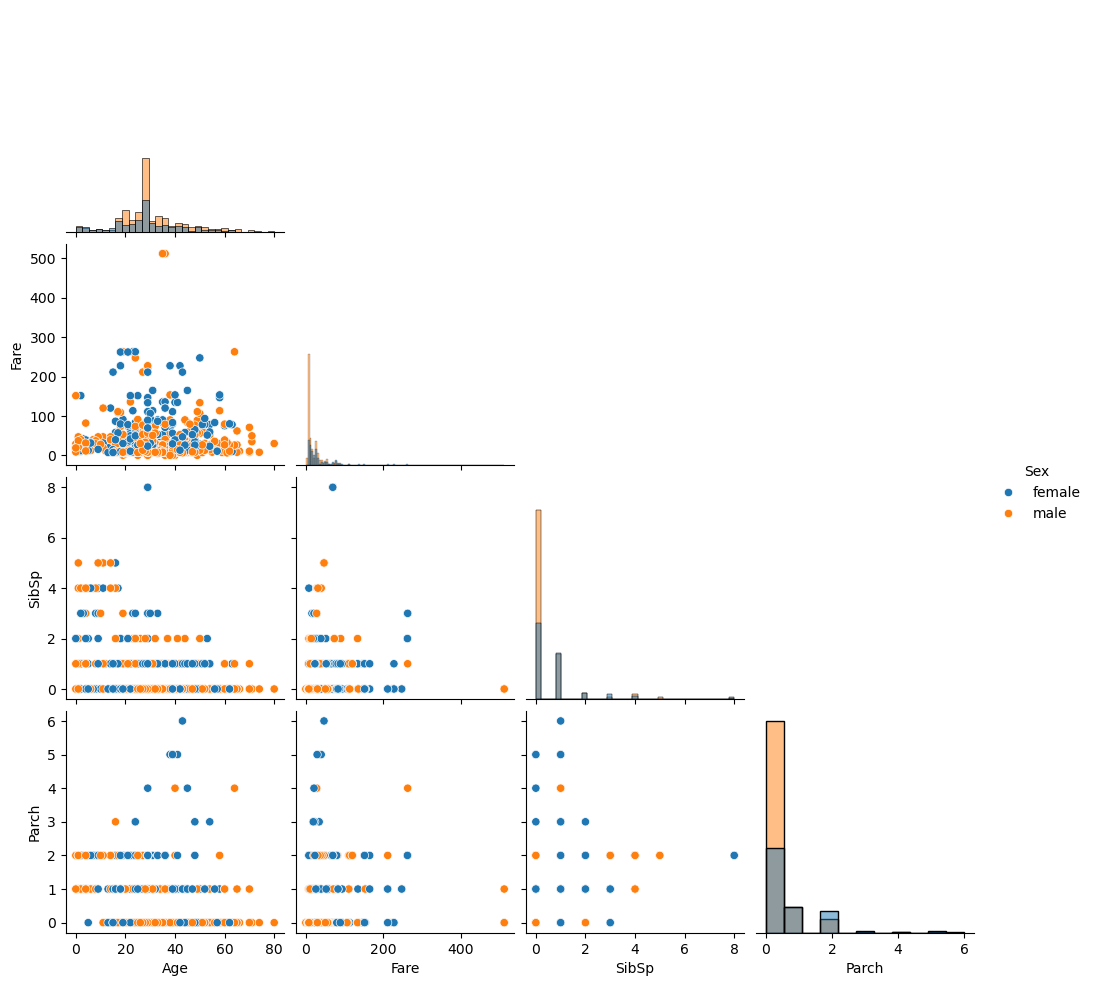

In [69]:
pp_cols = ['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Sex']
pp_df = df[pp_cols].dropna()
pp_df['Sex'] = pp_df['Sex'].astype('category')
sns.pairplot(pp_df, hue='Sex', vars=['Age','Fare','SibSp','Parch'], corner=True, diag_kind='hist')
plt.show()

# Plot histograms, boxplots, scatterplots

<Figure size 1000x600 with 0 Axes>

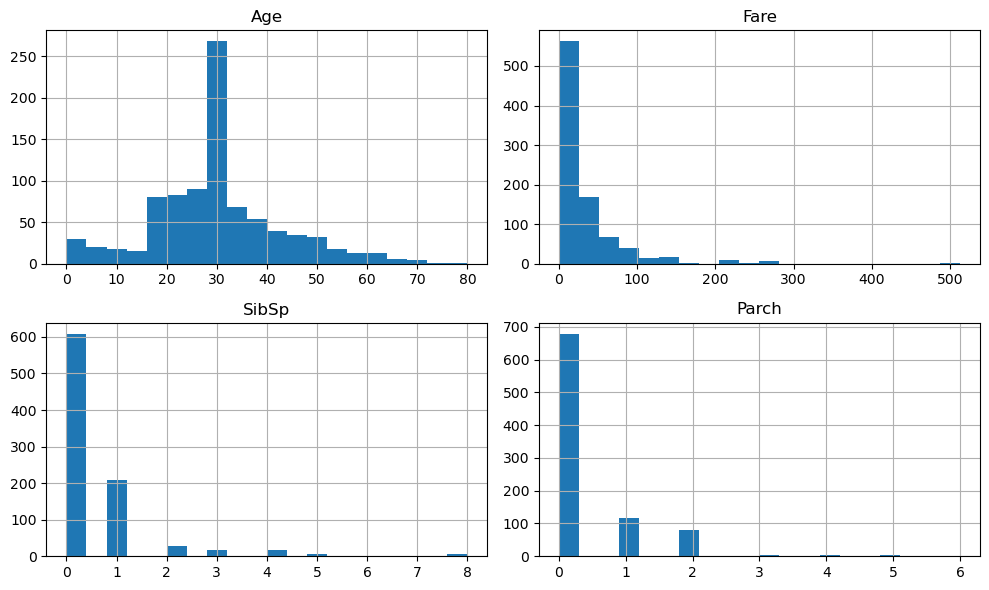

In [70]:
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
fig = plt.figure(figsize=(10,6))
df[numeric_cols].hist(bins=20, figsize=(10,6))
plt.tight_layout()
plt.show()

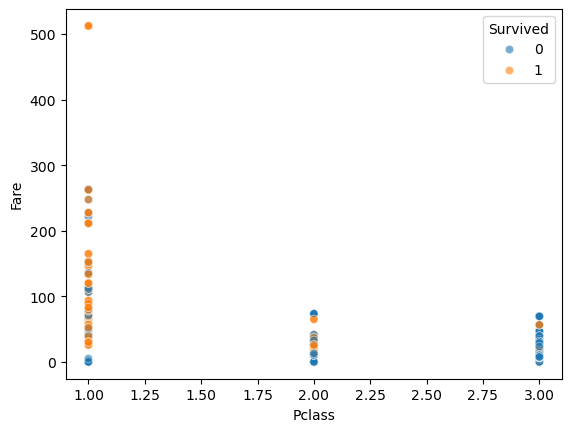

In [78]:
sns.scatterplot(data=df, x='Pclass', y='Fare', hue='Survived', alpha=0.6 )
plt.show()

# summary of findings

1) Survival skews negative overall, with class and fare indicating socioeconomic stratification in survival outcomes.
2) Strong gender imbalance in the dataset; visual stratification by Sex is meaningful for further analysis.
3) Age contains missing values; Cabin is mostly missing (likely to be excluded or used as binary has_cabin feature).
4) Fare is highly skewed; consider log-transform for modeling or robust stats.
Embarked mostly S with minor missingness; Pclass heavily concentrated in 3rd class.